Replace the NaN values with correct value. And justify why you have chosen the same.


In [1]:
import pandas as pd

In [2]:
dataset= pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum() #we find null columns in this code

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset.fillna({"salary": 0}, inplace=True) #since salary is 0 for non placed students we replace null with 0.

In [6]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#3 not placed

In [7]:
dataset[dataset["status"] == "Not Placed"].shape[0]

67

#Find the reason for non placement from the dataset?

In [8]:
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

In [9]:
print("Mean comparison:\n")
print("Placed:")
print(placed[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())
print("\nNot Placed:")
print(not_placed[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())

Mean comparison:

Placed:
ssc_p       71.721486
hsc_p       69.926554
degree_p    68.740541
etest_p     73.238041
mba_p       62.579392
dtype: float64

Not Placed:
ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
dtype: float64


In [10]:
print("\nWork Experience (Not Placed):")
print(not_placed['workex'].value_counts())

print("\nDegree Type (Not Placed):")
print(not_placed['degree_t'].value_counts())

print("\nSpecialisation (Not Placed):")
print(not_placed['specialisation'].value_counts())


Work Experience (Not Placed):
workex
No     57
Yes    10
Name: count, dtype: int64

Degree Type (Not Placed):
degree_t
Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: count, dtype: int64

Specialisation (Not Placed):
specialisation
Mkt&HR     42
Mkt&Fin    25
Name: count, dtype: int64


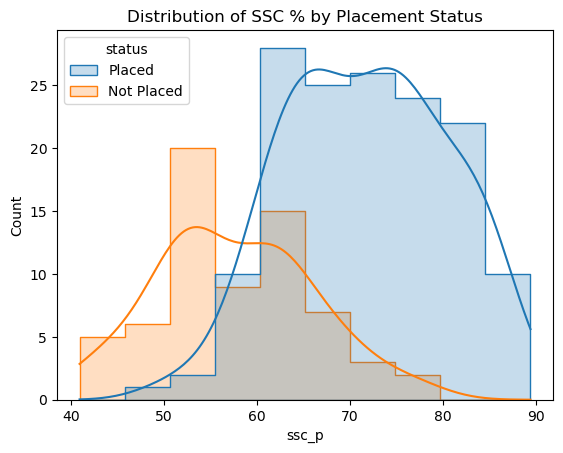

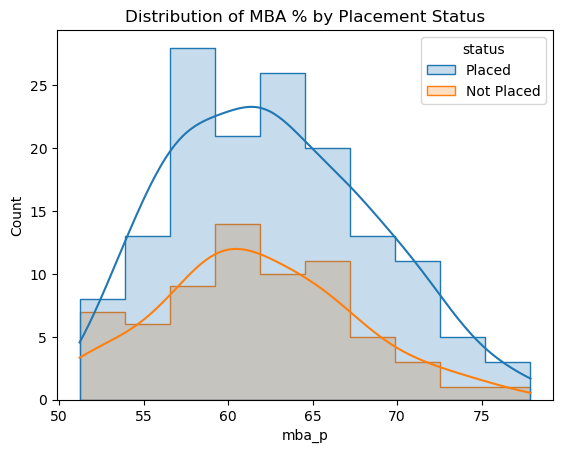

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=dataset, x='ssc_p', hue='status', kde=True, element='step')
plt.title("Distribution of SSC % by Placement Status")
plt.show()

sns.histplot(data=dataset, x='mba_p', hue='status', kde=True, element='step')
plt.title("Distribution of MBA % by Placement Status")
plt.show()


What kind of relation between salary and mba_p

In [12]:
correlation = dataset[['mba_p', 'salary']].corr()
print("Correlation between MBA % and Salary:\n", correlation)

Correlation between MBA % and Salary:
            mba_p    salary
mba_p   1.000000  0.139823
salary  0.139823  1.000000


As MBA percentage increases, salary tends to increase slightly, but the relationship is weak, so MBA marks alone don't strongly influence salary.

Which specialization is getting minimum salary?

In [13]:
placed = dataset[dataset['salary'] > 0]
min_salary_by_specialisation = placed.groupby('specialisation')['salary'].min()

print("Minimum salary by specialisation (only placed students):")
print(min_salary_by_specialisation)
min_specialisation = min_salary_by_specialisation.idxmin()
min_salary = min_salary_by_specialisation.min()

print(f"\nSpecialisation with minimum salary: {min_specialisation} (₹{min_salary})")

Minimum salary by specialisation (only placed students):
specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

Specialisation with minimum salary: Mkt&Fin (₹200000.0)


How many of them getting above 500000 salary?

In [14]:
high_salary_count = dataset[dataset['salary'] > 500000].shape[0]
print("Number of students with salary above ₹500,000:", high_salary_count)

Number of students with salary above ₹500,000: 3


Null Hypothesis:
There is no significant difference between the means of etest_p and mba_p.

Alternative Hypothesis :
There is a significant difference between the means of etest_p and mba_p.

In [15]:
import scipy.stats as stats
f_stat, p_value = stats.f_oneway(dataset['etest_p'], dataset['mba_p'])

print("F-statistic:", f_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Significant difference between etest_p and mba_p")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between etest_p and mba_p")

F-statistic: 98.64487057324706
p-value: 4.672547689133573e-21
Reject Null Hypothesis: Significant difference between etest_p and mba_p


There is a statistically significant difference between the mean values of:


This means the distribution of scores in etest_p and mba_p is not the same — they likely measure different aspects of student performance.

In [16]:
from scipy.stats import ttest_ind

placed = dataset[dataset['salary'] > 0]

sci_tech_salary = placed[placed['degree_t'] == 'Sci&Tech']['salary']
mkt_hr_salary = placed[placed['specialisation'] == 'Mkt&HR']['salary']

t_stat, p_value = ttest_ind(sci_tech_salary, mkt_hr_salary, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Significant difference in salary between Sci&Tech and Mkt&HR students.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in salary between Sci&Tech and Mkt&HR students.")

T-statistic: 2.5503380163544116
p-value: 0.013410910580431406
Reject Null Hypothesis: Significant difference in salary between Sci&Tech and Mkt&HR students.


This means the two groups do not have similar salary distributions — one group likely earns more or less on average than the other.

Convert the normal distribution to standard normal distribution for
salary column

In [17]:
placed = dataset[dataset['salary'] > 0].copy()

mean_salary = placed['salary'].mean()
std_salary = placed['salary'].std()

placed['salary_zscore'] = (placed['salary'] - mean_salary) / std_salary
print(placed[['salary', 'salary_zscore']].head())

     salary  salary_zscore
0  270000.0      -0.199614
1  200000.0      -0.948618
2  250000.0      -0.413615
4  425000.0       1.458895
7  252000.0      -0.392215


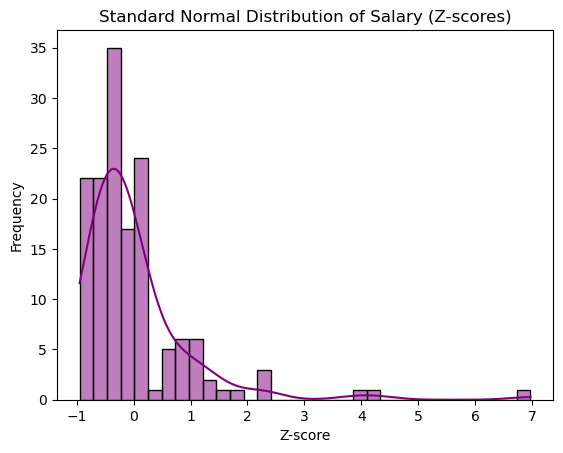

In [18]:
sns.histplot(placed['salary_zscore'], kde=True, color='purple')
plt.title("Standard Normal Distribution of Salary (Z-scores)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()

What is the probability Density Function of the salary range from
700000 to 900000?

In [19]:
from scipy.stats import norm
import numpy as np
placed = dataset[dataset['salary'] > 0]
mean_salary = placed['salary'].mean()
std_salary = placed['salary'].std()

salary_dist = norm(loc=mean_salary, scale=std_salary)

start = 700000
end = 900000

x_values = np.arange(start, end + 1, 1000)  # every ₹1000 step
pdf_values = salary_dist.pdf(x_values)

total_density = np.sum(pdf_values) * 1000 

print(f"Mean Salary: ₹{mean_salary:.2f}")
print(f"Standard Deviation: ₹{std_salary:.2f}")
print(f"Approximate PDF Area from ₹{start} to ₹{end}: {total_density:.4f}")


Mean Salary: ₹288655.41
Standard Deviation: ₹93457.45
Approximate PDF Area from ₹700000 to ₹900000: 0.0000


In [20]:
from scipy.stats import norm

mean_salary = placed['salary'].mean()
std_salary = placed['salary'].std()

dist = norm(mean_salary, std_salary)

# Exact probability using CDF
p = dist.cdf(900000) - dist.cdf(700000)

print(f"Probability of salary between ₹700000 and ₹900000: {p:.10f}")

Probability of salary between ₹700000 and ₹900000: 0.0000053774


it means there is 0% probability of students getting salary between 700000 and 900000

Test the similarity between the degree_t(Sci&Tech)with respect to
etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [22]:
from scipy.stats import ttest_ind
sci_tech = dataset[dataset['degree_t'] == 'Sci&Tech']
non_sci_tech = dataset[dataset['degree_t'] != 'Sci&Tech']

t_stat_etest, p_val_etest = ttest_ind(sci_tech['etest_p'], non_sci_tech['etest_p'], equal_var=False)
t_stat_mba, p_val_mba = ttest_ind(sci_tech['mba_p'], non_sci_tech['mba_p'], equal_var=False)

print("etest_p")
print("T-statistic:", t_stat_etest)
print("p-value:", p_val_etest)

print("\n mba_p")
print("T-statistic:", t_stat_mba)
print("p-value:", p_val_mba)

alpha = 0.05

if p_val_etest < alpha:
    print("\nReject H₀: Significant difference in etest_p between Sci&Tech and other degrees.")
else:
    print("\nFail to Reject H₀: No significant difference in etest_p.")

if p_val_mba < alpha:
    print("Reject H₀: Significant difference in mba_p between Sci&Tech and other degrees.")
else:
    print("Fail to Reject H₀: No significant difference in mba_p.")

etest_p
T-statistic: 0.13915774686597013
p-value: 0.8896048281190272

 mba_p
T-statistic: 1.816346909208204
p-value: 0.0722517158940914

Fail to Reject H₀: No significant difference in etest_p.
Fail to Reject H₀: No significant difference in mba_p.


Which parameter is highly correlated with salary?

In [23]:
correlation_matrix = dataset.corr(numeric_only=True)
salary_corr = correlation_matrix['salary'].drop('salary')

most_correlated_param = salary_corr.idxmax()
highest_corr_value = salary_corr.max()

print("Correlation of parameters with Salary:")
print(salary_corr.sort_values(ascending=False))

print(f"\n Most highly correlated parameter with salary: '{most_correlated_param}' (Correlation = {highest_corr_value:.4f})")

Correlation of parameters with Salary:
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
sl_no       0.002543
Name: salary, dtype: float64

 Most highly correlated parameter with salary: 'ssc_p' (Correlation = 0.5381)


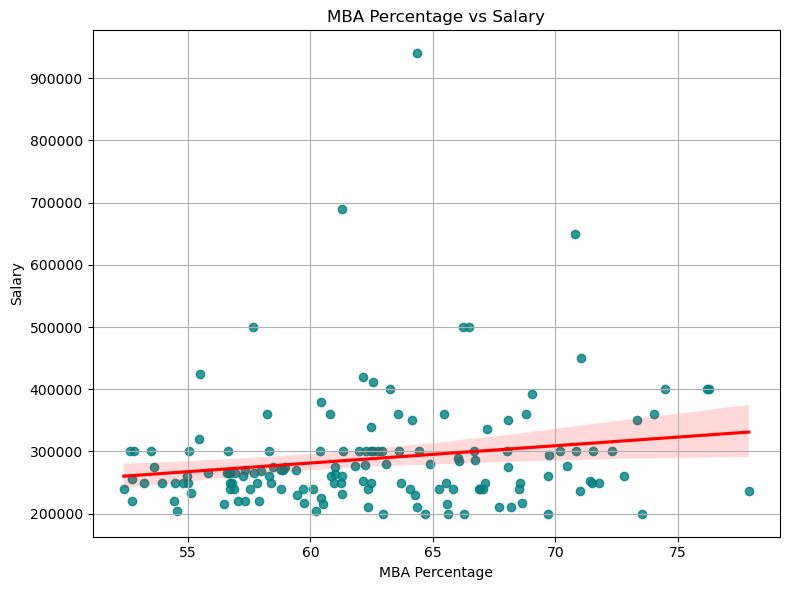

In [24]:
placed = dataset[dataset['salary'] > 0]

plt.figure(figsize=(8,6))
sns.regplot(x='mba_p', y='salary', data=placed, color='teal', line_kws={"color": "red"})
plt.title("MBA Percentage vs Salary")
plt.xlabel("MBA Percentage")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

This shows higher MBA scores slightly increase the chance of higher salary, but it’s not a strong predictor.